# PCA

In [2]:
#import library needed
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns


In [3]:
path = r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final"
data = pd.read_csv(r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final\train_values.csv")
label = pd.read_csv(r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final\train_labels.csv")
test = pd.read_csv(r"C:\Users\lalal\Desktop\code_tutorial\ML\data\final\test_values.csv")

In [4]:
train = pd.merge(data,label[['building_id', 'damage_grade']],on='building_id', how='left')
train.describe


<bound method NDFrame.describe of         building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30         

In [5]:
#chuẩn hóa dữ liệu 
drop_col = ['land_surface_condition',"foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration",'legal_ownership_status']
X =data.drop(columns=drop_col, axis=1)
feature_names = X.columns

X1 = train.drop(columns=drop_col, axis=1)
print(X1)



        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1  

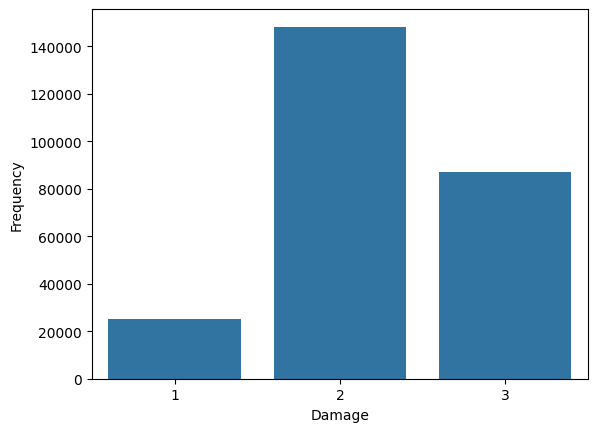

In [6]:
# Vẽ biểu đồ tần suất
sns.countplot(x='damage_grade', data=train)

# Đặt tên cho trục x và y
plt.xlabel('Damage')
plt.ylabel('Frequency')
# Hiển thị biểu đồ
plt.show()

In [22]:

print(type(X))
print(type(X.mean()))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Correlation matrix')

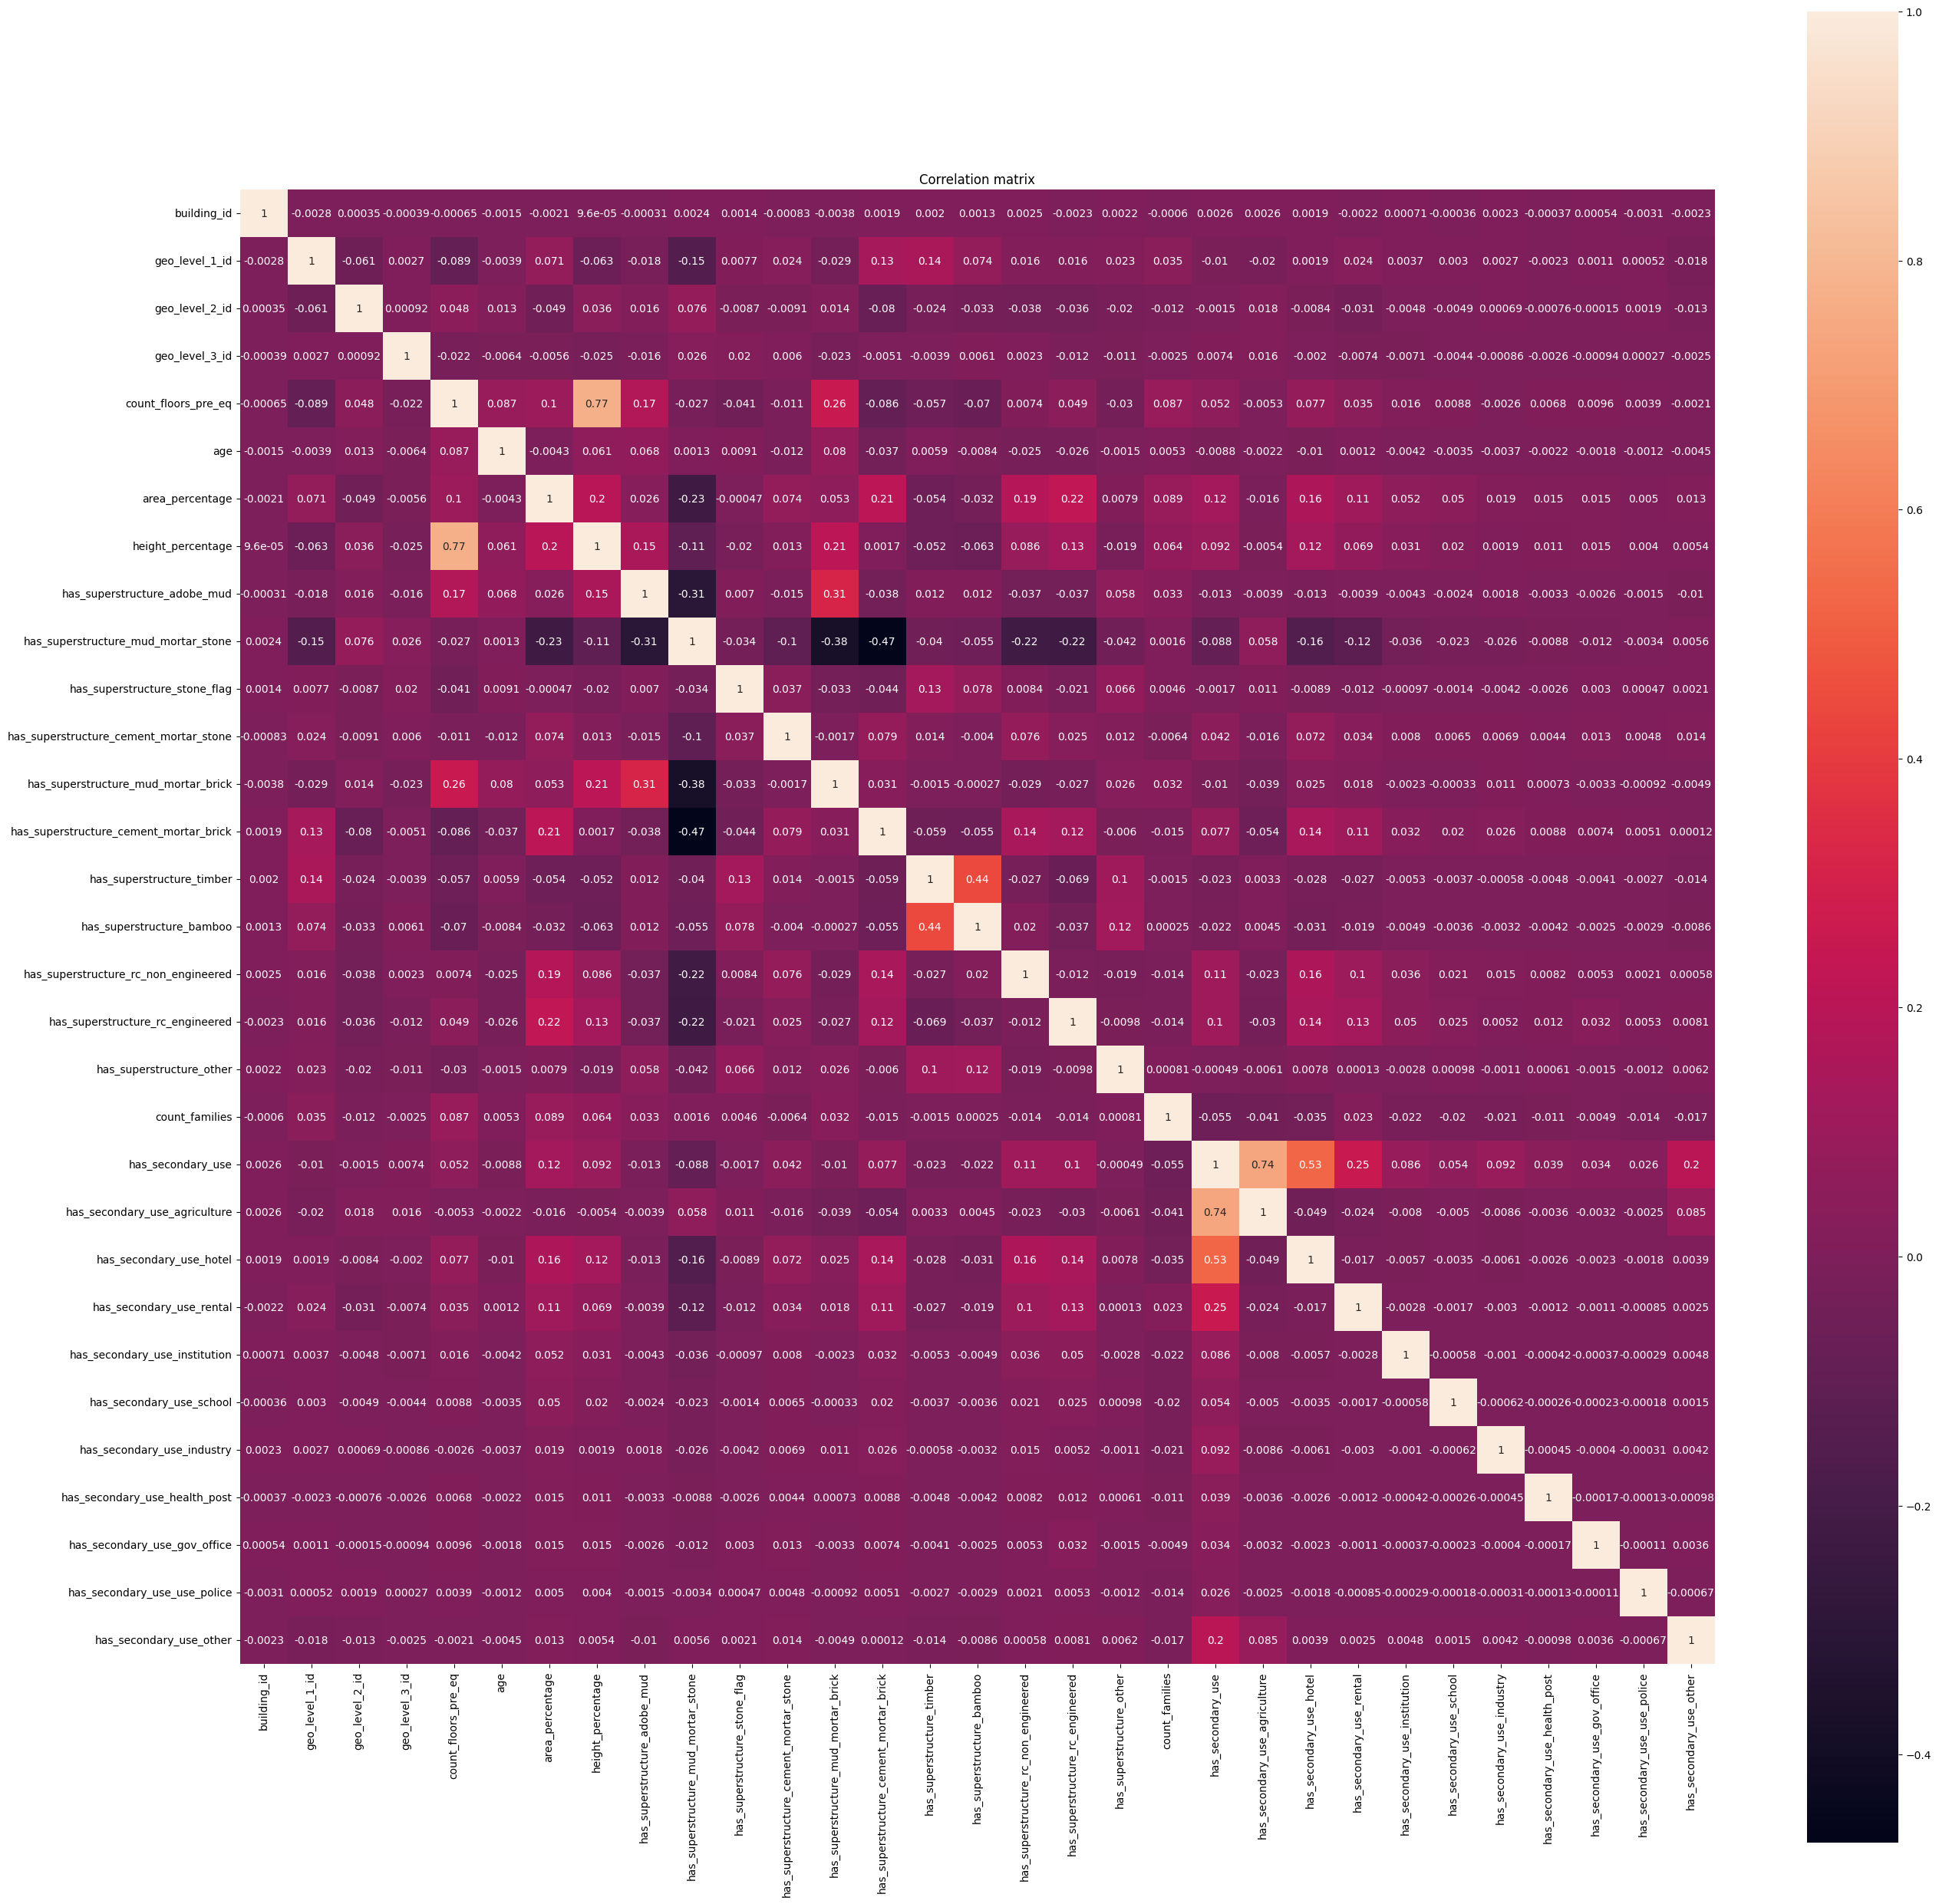

In [23]:
# X = (X - X.mean()) / X.std(ddof=0)

print(type(X), type(X.mean()))

# Calculating the correlation matrix of the data
# X_corr = (1 / 150) * X.T.dot(X)
X_corr = X.corr()
# Plotting the correlation matrix
plt.figure(figsize=(31,31))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')


In [24]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming X is your data and feature_names is a list of feature names
# If you don't have feature names, you can create them based on your understanding of the data
# For example: feature_names = ["Feature1", "Feature2", ...]


pca = PCA(n_components=31)
pca.fit(X)

# Variance explained by each component
variance_explained = pca.explained_variance_ratio_

# Create labels for the variances based on feature names or other descriptors
labels = [f"Variance explained by {feature_names[i]}" for i in range(len(variance_explained))]

# Print or use labels as needed
for label, variance in zip(labels, variance_explained):
    print(label, ": ", variance)


Variance explained by building_id :  0.9998547684676777
Variance explained by geo_level_1_id :  0.00014333600879001384
Variance explained by geo_level_2_id :  1.8362343318368997e-06
Variance explained by geo_level_3_id :  5.8330966364575676e-08
Variance explained by count_floors_pre_eq :  6.947714618979398e-10
Variance explained by age :  2.0843897032525847e-10
Variance explained by area_percentage :  4.0770264412726215e-11
Variance explained by height_percentage :  2.3675390143207074e-12
Variance explained by has_superstructure_adobe_mud :  2.2080753712681187e-12
Variance explained by has_superstructure_mud_mortar_stone :  2.105958614531761e-12
Variance explained by has_superstructure_stone_flag :  1.8298631689137854e-12
Variance explained by has_superstructure_cement_mortar_stone :  1.5163727662886864e-12
Variance explained by has_superstructure_mud_mortar_brick :  8.534233346660469e-13
Variance explained by has_superstructure_cement_mortar_brick :  6.130129128860545e-13
Variance exp

In [25]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)


EigResult(eigenvalues=array([2.52688346, 1.97218645, 0.00603613, 1.83702738, 0.21170189,
       0.31893691, 1.59583509, 0.54446739, 1.27915488, 0.65595989,
       0.68538698, 0.77219992, 0.81851609, 1.09347439, 0.88476627,
       0.91845723, 0.9258359 , 1.04726551, 0.95199952, 1.02308035,
       0.96879388, 0.97603806, 0.98622181, 0.99014175, 0.99663863,
       0.997179  , 1.00553235, 1.00531234, 1.00308112, 1.00118827,
       1.00070118]), eigenvectors=array([[ 1.03288277e-03,  4.06389249e-03,  1.34042447e-04,
        -2.66040757e-03, -5.05831583e-04, -2.09428705e-03,
        -4.14751762e-03,  1.70063585e-03, -6.07936294e-03,
        -8.86034129e-03, -4.87116200e-03, -1.15110003e-02,
         6.43391842e-03,  4.08871852e-02,  8.69666879e-03,
        -4.40417313e-03, -1.27420246e-03,  9.93676759e-03,
        -8.23845260e-02, -6.46463025e-02, -4.36487784e-03,
         3.80645739e-02,  5.88795250e-03,  1.38885994e-01,
         7.11413248e-01, -1.15343101e-01,  3.93575850e-01,
         3.

Text(0.5, 0, 'Dimensions')

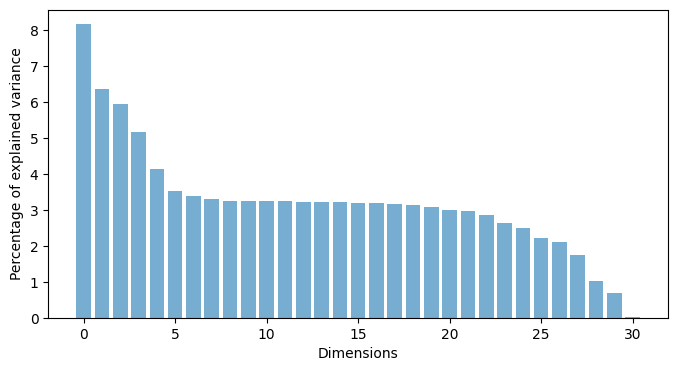

In [26]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(31), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')



In [27]:
# calculating our new axis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])
pc3 = X.dot(eig_vectors[:,2])


<Figure size 640x480 with 0 Axes>

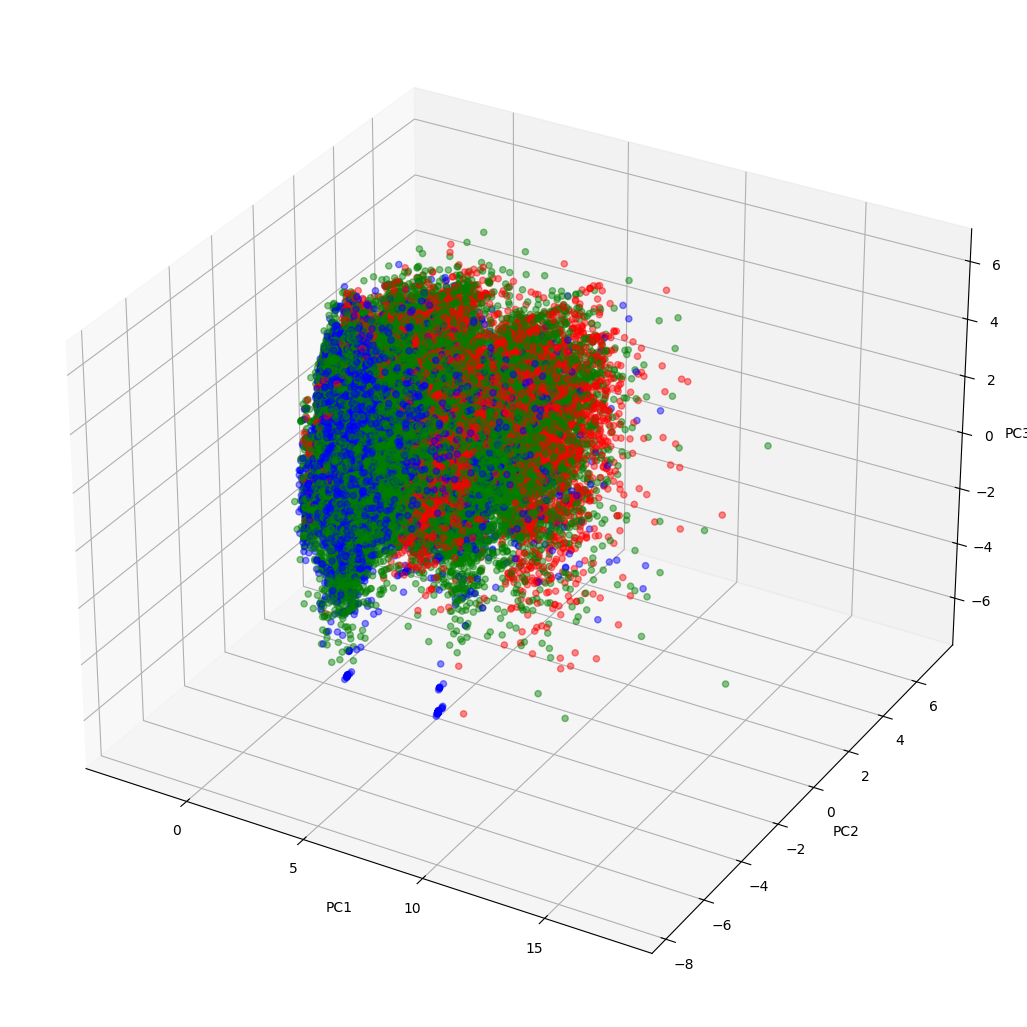

In [28]:

color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = train["damage_grade"].map(color_map)
fig = plt.figure()
fig = plt.figure(figsize=(13, 14))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pc1, pc2,pc3, c=colors, marker="o", alpha=0.45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

# logistic 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
drop_col = ['land_surface_condition',"foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration",'legal_ownership_status']

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=drop_col, axis=1), train['damage_grade'], test_size=0.2, random_state= 5)




In [30]:

# Chạy trên dữ liệu gốc
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# acc và conf_mat trên dữ liệu gốc
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix0 = confusion_matrix(y_test, y_pred)

print("acc:", accuracy)
print("confusion matrix:\n", confusion_matrix0)

acc: 0.5669499817731817
confusion matrix:
 [[    0  5088     0]
 [    0 29550     0]
 [    0 17483     0]]


In [31]:
labels=[1, 2,3]
parameters = {'C':[0.01, 0.1, 1,5, 10], 'penalty':['l2']}
log_reg = LogisticRegression(class_weight='none')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=0, n_jobs='none')
logmodel = LogisticRegression(class_weight=None)
p = logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(sum(predictions == 1)
,sum(predictions == 3)
,sum(predictions == 2))

0 0 52121
